<a href="https://colab.research.google.com/github/ManishaLokasani/Manisha_INFO5731_Spring2023/blob/main/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [222]:
# Write your code here




import pandas as pd
import time

user_data= pd.read_csv('https://raw.githubusercontent.com/ManishaLokasani/Manisha_INFO5731_Spring2023/main/user_reviews%20(1).csv')



In [223]:
user_data.head()

,Unnamed: 0,user_reviews
0,0,"Ummmmm, where do I begin. I didn't watch any t..."
1,1,This film is exactly what you think it is. It'...
2,2,"What a wild ride! The ""ambulance scene"" alone ..."
3,3,Cocaine Bear is the story of a bear who takes ...
4,4,I first groaned and rolled my eyes when I hear...


In [224]:
user_data=user_data.drop(['Unnamed: 0'], axis=1)

In [225]:
user_data.head()

,user_reviews
0,"Ummmmm, where do I begin. I didn't watch any t..."
1,This film is exactly what you think it is. It'...
2,"What a wild ride! The ""ambulance scene"" alone ..."
3,Cocaine Bear is the story of a bear who takes ...
4,I first groaned and rolled my eyes when I hear...


In [226]:
#removing noise ,special characters and punctuations 

user_data['user_reviews'] = user_data['user_reviews'].str.replace('[^\w\s]','')
user_data['user_reviews'].head()


<ipython-input-226-2269d7abfd51>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  user_data['user_reviews'] = user_data['user_reviews'].str.replace('[^\w\s]','')


0    Ummmmm where do I begin I didnt watch any trai...
1    This film is exactly what you think it is Its ...
2    What a wild ride The ambulance scene alone mak...
3    Cocaine Bear is the story of a bear who takes ...
4    I first groaned and rolled my eyes when I hear...
Name: user_reviews, dtype: object

In [227]:
# removing numbers 
user_data['user_reviews'] = user_data['user_reviews'].apply(lambda x: " ".join([x for x in x.split() if  not x.isdigit()]))


In [228]:
#removing stop words 

import string
import pandas as pd
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')
user_data['user_reviews'] = user_data['user_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
user_data['user_reviews'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    Ummmmm I begin I didnt watch trailers read rev...
1    This film exactly think Its bear cocaine going...
2    What wild ride The ambulance scene alone makes...
3    Cocaine Bear story bear takes much cocaine stu...
4    I first groaned rolled eyes I heard made film ...
Name: user_reviews, dtype: object

In [229]:
# lowercase all the text
user_data['user_reviews'] = user_data['user_reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
user_data["cleaned_txt"]=user_data["user_reviews"]
user_data.to_csv("cleaned data")
user_data.head()


,user_reviews,cleaned_txt
0,ummmmm i begin i didnt watch trailers read rev...,ummmmm i begin i didnt watch trailers read rev...
1,this film exactly think its bear cocaine going...,this film exactly think its bear cocaine going...
2,what wild ride the ambulance scene alone makes...,what wild ride the ambulance scene alone makes...
3,cocaine bear story bear takes much cocaine stu...,cocaine bear story bear takes much cocaine stu...
4,i first groaned rolled eyes i heard made film ...,i first groaned rolled eyes i heard made film ...


In [282]:
from textblob import TextBlob
user_data['Spelling Correction'] = user_data['user_reviews'].apply(lambda x: str(TextBlob(x).correct()))

In [283]:
# tokenization
import nltk
nltk.download('punkt')
user_data['Tokenization'] = user_data['Spelling Correction'].apply(lambda x: TextBlob(x).words)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [284]:
#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
user_data['Stemming'] = user_data['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))


In [287]:
#Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')

user_data['Lemmatization'] = user_data['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
user_data.to_csv('https://raw.githubusercontent.com/ManishaLokasani/Manisha_INFO5731_Spring2023/main/user_reviews%20(1).csv',index=False)



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [274]:
from textblob import TextBlob
TextBlob(user_data['user_reviews'][0]).ngrams(3)

[WordList(['Ummmmm', 'where', 'do']),
 WordList(['where', 'do', 'I']),
 WordList(['do', 'I', 'begin']),
 WordList(['I', 'begin', 'I']),
 WordList(['begin', 'I', 'did']),
 WordList(['I', 'did', "n't"]),
 WordList(['did', "n't", 'watch']),
 WordList(["n't", 'watch', 'any']),
 WordList(['watch', 'any', 'trailers']),
 WordList(['any', 'trailers', 'or']),
 WordList(['trailers', 'or', 'read']),
 WordList(['or', 'read', 'any']),
 WordList(['read', 'any', 'reviews']),
 WordList(['any', 'reviews', 'I']),
 WordList(['reviews', 'I', 'saw']),
 WordList(['I', 'saw', 'the']),
 WordList(['saw', 'the', 'poster']),
 WordList(['the', 'poster', 'and']),
 WordList(['poster', 'and', 'title']),
 WordList(['and', 'title', 'and']),
 WordList(['title', 'and', 'thought']),
 WordList(['and', 'thought', 'I']),
 WordList(['thought', 'I', "'m"]),
 WordList(['I', "'m", 'definitely']),
 WordList(["'m", 'definitely', 'watching']),
 WordList(['definitely', 'watching', 'that']),
 WordList(['watching', 'that', 'After']),

In [289]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in user_data['Lemmatization']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))


In [290]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('it', "'s", 'not'): 10, ("o'th", 'jackson', 'or'): 6, ('a', 'lot', 'of'): 6, ('i', 'did', "n't"): 5, ('it', "'s", 'a'): 5, ('cocain', 'dear', 'is'): 4, ('with', 'thi', 'movi'): 4, ('the', 'ambul', 'scene'): 4, ('the', 'bear', 'is'): 4, ('of', 'the', 'movi'): 4, ...})

In [291]:
#bigrams
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))


('ummmmm', 'where'):1.0
('where', 'do'):0.1
('do', 'i'):0.05263157894736842
('i', 'begin'):0.012658227848101266
('begin', 'i'):0.25
('i', 'did'):0.10126582278481013
('did', "n't"):0.5
("n't", 'watch'):0.024390243902439025
('watch', 'ani'):0.09090909090909091
('ani', 'trailer'):0.14285714285714285
('trailer', 'or'):0.1111111111111111
('or', 'read'):0.04
('read', 'ani'):1.0
('ani', 'review'):0.14285714285714285
('review', 'i'):0.5
('i', 'saw'):0.02531645569620253
('saw', 'the'):0.5
('the', 'poster'):0.0035460992907801418
('poster', 'and'):1.0
('and', 'titl'):0.0070921985815602835
('titl', 'and'):0.3333333333333333
('and', 'thought'):0.0070921985815602835
('thought', 'i'):0.25
('i', "'m"):0.0759493670886076
("'m", 'definit'):0.125
('definit', 'watch'):0.2
('watch', 'that'):0.09090909090909091
('that', 'after'):0.01639344262295082
('after', 'see'):0.3333333333333333
('see', 'it'):0.25
('it', 'i'):0.00819672131147541
('i', 'can'):0.012658227848101266
('can', 'say'):0.14285714285714285
('say

In [294]:
# Extracting the noun phrases 

whole_dataset = ''
index = []
i = 1
for line in user_data['Lemmatization']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [297]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [298]:

from textblob import TextBlob
noun_phrases = []
frequency = []
for line in user_data['Lemmatization']:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in user_data['Lemmatization']:
    noun_phrases_freq.append(line.count(word) / whole_dataset.count(word))
  frequency.append(noun_phrases_freq)
noun_phrases_user_data = pd.DataFrame(frequency).T
noun_phrases_user_data.columns = list(noun_phrases)
noun_phrases_user_data.index = index
noun_phrases_user_data

,ani trailer,ani review i,i 'm definit,'s exactli,movi name cocain dear,extrem fun,outrag thrill thi movi,hyster i wa full-volum laugh,mani part,perfect combin,...,thi perhap,cocain joke,funni i guess,wa ball,bland comedi,despic peopl,dumb thing,bear.though onli,minut thi,long prologu
Review-1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [306]:
# Write your code here

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfs = tfidf.fit_transform(user_data['Lemmatization'].values.tolist())
feature_names = tfidf.get_feature_names_out()
corpus_index = [n for n in range(len(user_data))]
tfidf_df = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
tfidf_df.head()



,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
10,0.000000,0.0,0.0,0.000000,0.0,0.072958,0.0,0.0,0.000000,0.0,...,0.09913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
100,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.052767,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046051
11,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
12,0.000000,0.0,0.0,0.122275,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
13,0.101483,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [309]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import gensim

all_tokens = [word_tokenize(text) for text in user_data['Lemmatization']]
query = "Did really he bear conusme the cocaine, how did it got the cocaine "
X_set = set(word_tokenize(query))
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2

def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine

similarity_list = []
for sentence in user_data['Lemmatization']:
  Y_set = set(word_tokenize(sentence))
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(user_data['Lemmatization'],similarity_list)), columns=['user_reviews','Cosine Similarity'])
cosine_dataframe


,user_reviews,Cosine Similarity
0,ummmmm where do i begin i did n't watch ani tr...,0.081832
1,hi film is exactli what you think it is it 's ...,0.097435
2,that a wild ride the ambul scene alon make thi...,0.095637
3,cocain dear is the stori of a bear who take to...,0.097435
4,i first groan and roll my eye when i heard the...,0.100887
5,you do n't need a lengthi analysi or someon to...,0.078730
6,give elizabeth rank an award for bring funni b...,0.182574
7,'cocain dear doe exactli what it say on the bo...,0.073193
8,and it 's veri good at be just that.grant i re...,0.129099
9,cocain dear offer littl beyond the trailer in ...,0.140193


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [245]:
# Write your code here



%pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [314]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import numpy as np

sentences = user_data['Lemmatization'].values.tolist()[0:10]
sent_tokens = [word_tokenize(sent) for sent in sentences]
model = Word2Vec(sent_tokens, vector_size=500, window=5, min_count=1, workers=4)
word_vectors = model.wv.vectors
words = model.wv.index_to_key
pca = PCA(n_components=300)
word_vectors_300d = pca.fit_transform(word_vectors)
model.wv.vectors = word_vectors_300d
model.wv.key_to_index['bear']



14

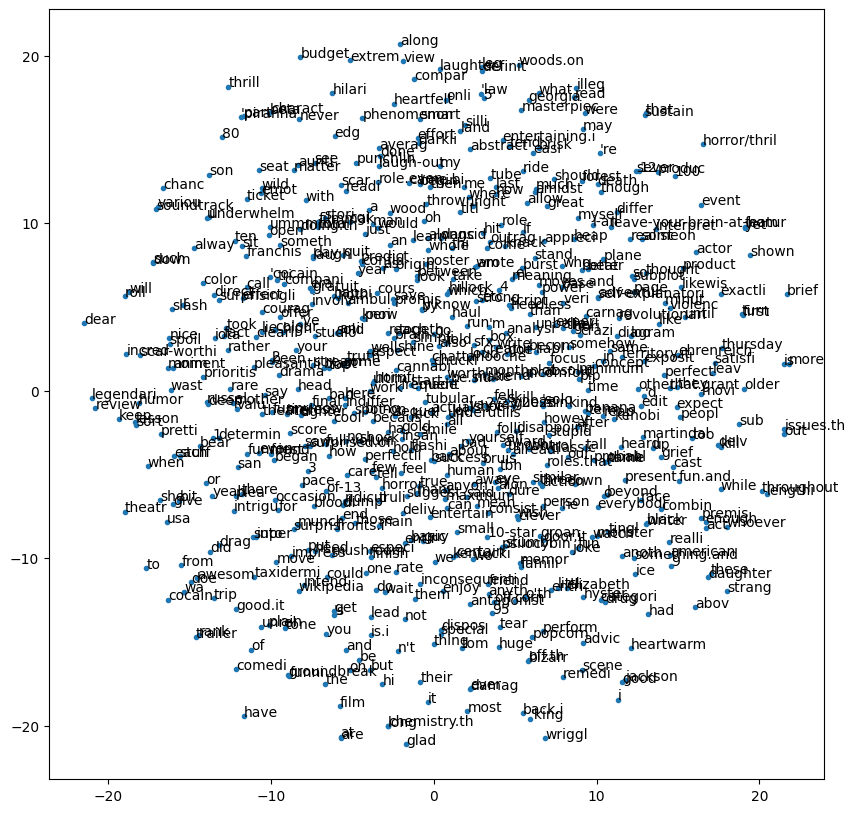

In [315]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
word_vectors = model.wv.vectors
words = model.wv.index_to_key
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)
plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='.')
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [233]:
# The GitHub link of your final csv file



# Link:  https://github.com/ManishaLokasani/Manisha_INFO5731_Spring2023/blob/main/userdata.csv



